# Federated Learning - Régression polynomiale

In [1]:
# Importation des modules de génération de données
from FLSimulator import OneDimensionalRDG, OneDimensionalLRDG

# Importation des modèles de machine learning disponibles
from FLSimulator import GDRegressor, LogisticRegressor

# Importation des modules pour créer un réseau fédéré
from FLSimulator import CentralServer, Node, FederatedNetwork

# Importation d'un module a utilisé comme fonction de base phi
from FLSimulator import polynomial_features

# Importation d'une fonction pour regrouper les données de façon centralisé
from FLSimulator import regroup_data_base

from random import randint, seed
from matplotlib import pyplot as plt
import numpy as np

# Activation de LaTeX pour les illustrations
plt.rc('text', usetex=True)

# Mise en place des seeds
seed(9)
np.random.seed(2020)

### On crée un réseau fédéré constitué de 3 bases de données fédérées disposant de 150 à 250 observations obtenues à partir de la fonction $\sin(2\pi x)$ où les x sont tirés de différentes lois beta de paramètres $(\alpha_i, \beta_i)$. L'indice $i$ désigne la i-ème base de données fédérées.

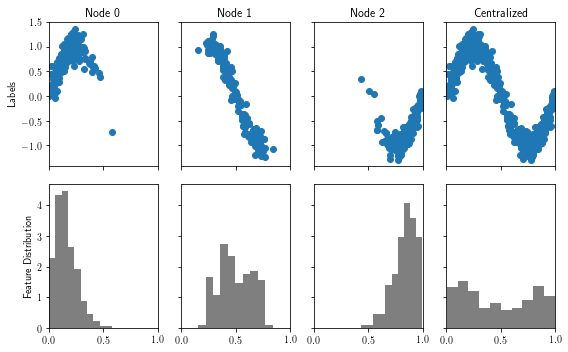

In [4]:
# 1. Création des bases de données fédérées

# 1.1 Création des axes montrant les obsevations de chaque base de données
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(8, 5), sharey='row', sharex='col')

# 1.1 Création des DataGenerator utilisés pour générer les bases de données de chaque client (Node).
#     Les données présenteront un problème de régression simple
alpha_beta = [(2,10), (5,5), (10,2)]

# 1.2 Création des Node
nodes = []
axes[0][0].set_ylabel('Labels')
axes[1][0].set_ylabel('Feature Distribution')

for i in range(3):
    
    DG = OneDimensionalRDG(noise=0.15, label_function='sin', a=alpha_beta[i][0], b=alpha_beta[i][1])
    
    X, t = DG.generate_data(randint(150, 250))
    DG.distribution_and_labels(X,t, title='Node '+ str(i), axes=[axes[0][i], axes[1][i]])
    nodes.append(Node(X, t))
    
# Illustration de la base de données si elle était centralisée
X_total, t_total = regroup_data_base(nodes)
OneDimensionalRDG.distribution_and_labels(X_total, t_total, title='Centralized', axes=[axes[0][3], axes[1][3]])
fig.tight_layout()

plt.show()
